In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

## Data Exploration

In [2]:
df = pd.read_excel("online_retail_II.xlsx", sheet_name=0)

In [3]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [4]:
def replace_dash_with_underscore(df):
    """
    Replace all dash characters (-) with underscores (_) in column names of a DataFrame.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame whose column names need to be modified.
    
    Returns:
    --------
    pandas.DataFrame
        A DataFrame with modified column names.
    """
    # Create a mapping of original column names to new column names
    column_mapping = {col: col.replace(' ', '_') for col in df.columns}
    
    # Rename the columns using the mapping
    df_renamed = df.rename(columns=column_mapping)
    
    return df_renamed
    
# Apply the function
df_renamed = replace_dash_with_underscore(df)
print("\nRenamed DataFrame column names:")
print(df_renamed.columns.tolist())


Renamed DataFrame column names:
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer_ID', 'Country']


In [5]:
df_renamed = df_renamed.map(lambda x: x.lower() if isinstance(x, str) else x)

In [7]:
df_renamed = df_renamed.rename(columns={'Invoice':'invoice', 'StockCode':'stock_code', 'Description':'description',
                                        'Quantity':'quantity', 'InvoiceDate':'invoice_date', 'Price':'price',
                                        'Customer_ID':'customer_id', 'Country':'country'})

In [8]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice       525461 non-null  object        
 1   stock_code    525461 non-null  object        
 2   description   522533 non-null  object        
 3   quantity      525461 non-null  int64         
 4   invoice_date  525461 non-null  datetime64[ns]
 5   price         525461 non-null  float64       
 6   customer_id   417534 non-null  float64       
 7   country       525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [9]:
df_renamed.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.00,united kingdom
1,489434,79323p,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.00,united kingdom
2,489434,79323w,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.00,united kingdom
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.00,united kingdom
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.00,united kingdom


In [10]:
df_renamed.describe()

,quantity,invoice_date,price,customer_id
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [11]:
df_renamed.describe(include='O')

,invoice,stock_code,description,country
count,525461,525461,522533,525461
unique,28816,4481,4672,40
top,537434,85123a,white hanging heart t-light holder,united kingdom
freq,675,3550,3549,485852


In [12]:
df_renamed[df_renamed['customer_id'].isna()].head(10)

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,united kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,united kingdom
284,489467,85123a,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,united kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,united kingdom
577,489525,85226c,blue pull back racing car,1,2009-12-01 11:49:00,0.55,NaN,united kingdom
578,489525,85227,set/6 3d kit cards for kids,1,2009-12-01 11:49:00,0.85,NaN,united kingdom
1055,489548,22271,feltcraft doll rosie,1,2009-12-01 12:32:00,2.95,NaN,united kingdom
1056,489548,22254,felt toadstool large,12,2009-12-01 12:32:00,1.25,NaN,united kingdom
1057,489548,22273,feltcraft doll molly,3,2009-12-01 12:32:00,2.95,NaN,united kingdom
1058,489548,22195,large heart measuring spoons,1,2009-12-01 12:32:00,1.65,NaN,united kingdom


In [13]:
df_renamed[df_renamed['quantity'] < 0].head(10)

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
178,c489449,22087,paper bunting white lace,-12,2009-12-01 10:33:00,2.95,16321.00,australia
179,c489449,85206a,cream felt easter egg basket,-6,2009-12-01 10:33:00,1.65,16321.00,australia
180,c489449,21895,potting shed sow 'n' grow set,-4,2009-12-01 10:33:00,4.25,16321.00,australia
181,c489449,21896,potting shed twine,-6,2009-12-01 10:33:00,2.10,16321.00,australia
182,c489449,22083,paper chain kit retro spot,-12,2009-12-01 10:33:00,2.95,16321.00,australia
183,c489449,21871,save the planet mug,-12,2009-12-01 10:33:00,1.25,16321.00,australia
184,c489449,84946,antique silver tea glass etched,-12,2009-12-01 10:33:00,1.25,16321.00,australia
185,c489449,84970s,hanging heart zinc t-light holder,-24,2009-12-01 10:33:00,0.85,16321.00,australia
186,c489449,22090,paper bunting retro spots,-12,2009-12-01 10:33:00,2.95,16321.00,australia
196,c489459,90200a,purple sweetheart bracelet,-3,2009-12-01 10:44:00,4.25,17592.00,united kingdom


In [14]:
df_renamed['invoice'] = df_renamed['invoice'].astype("str")
df_renamed[df_renamed['invoice'].str.match("^\\d{6}$") == False]

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
178,c489449,22087,paper bunting white lace,-12,2009-12-01 10:33:00,2.95,16321.00,australia
179,c489449,85206a,cream felt easter egg basket,-6,2009-12-01 10:33:00,1.65,16321.00,australia
180,c489449,21895,potting shed sow 'n' grow set,-4,2009-12-01 10:33:00,4.25,16321.00,australia
181,c489449,21896,potting shed twine,-6,2009-12-01 10:33:00,2.10,16321.00,australia
182,c489449,22083,paper chain kit retro spot,-12,2009-12-01 10:33:00,2.95,16321.00,australia
...,...,...,...,...,...,...,...,...
524695,c538123,22956,36 foil heart cake cases,-2,2010-12-09 15:41:00,2.10,12605.00,germany
524696,c538124,m,manual,-4,2010-12-09 15:43:00,0.50,15329.00,united kingdom
524697,c538124,22699,roses regency teacup and saucer,-1,2010-12-09 15:43:00,2.95,15329.00,united kingdom
524698,c538124,22423,regency cakestand 3 tier,-1,2010-12-09 15:43:00,12.75,15329.00,united kingdom


In [15]:
df_renamed['invoice'].str.replace('[0-9]', '', regex=True).unique()

array(['', 'c', 'a'], dtype=object)

In [16]:
df_renamed[df_renamed['invoice'].str.startswith("a")]

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
179403,a506401,b,adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,united kingdom
276274,a516228,b,adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,united kingdom
403472,a528059,b,adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,united kingdom


In [17]:
df_renamed['stock_code'] = df_renamed['stock_code'].astype("str")
df_renamed[(df_renamed['stock_code'].str.match("^\\d{5}$") == False) &
(df_renamed['stock_code'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['stock_code'].unique()

array(['post', 'd', 'dcgs0058', 'dcgs0068', 'dot', 'm', 'dcgs0004',
       'dcgs0076', 'c2', 'bank charges', 'dcgs0003', 'test001',
       'gift_0001_80', 'dcgs0072', 'gift_0001_20', 'dcgs0044', 'test002',
       'gift_0001_10', 'gift_0001_50', 'dcgs0066n', 'gift_0001_30',
       'pads', 'adjust', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'dcgssgirl', 'dcgs0006', 'dcgs0016', 'dcgs0027',
       'dcgs0036', 'dcgs0039', 'dcgs0060', 'dcgs0056', 'dcgs0059', 'gift',
       'dcgslboy', 'dcgs0053', 'dcgs0062', 'dcgs0037', 'dcgssboy',
       'dcgslgirl', 's', 'dcgs0069', 'dcgs0070', 'dcgs0075', 'b',
       'dcgs0041', 'adjust2', '47503j ', 'c3', 'sp1002', 'amazonfee'],
      dtype=object)

In [18]:
df_renamed[df_renamed['stock_code'].str.contains("^dot")]

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
2379,489597,dot,dotcom postage,1,2009-12-01 14:28:00,647.19,NaN,united kingdom
2539,489600,dot,dotcom postage,1,2009-12-01 14:43:00,55.96,NaN,united kingdom
2551,489601,dot,dotcom postage,1,2009-12-01 14:44:00,68.39,NaN,united kingdom
2571,489602,dot,dotcom postage,1,2009-12-01 14:45:00,59.35,NaN,united kingdom
2619,489603,dot,dotcom postage,1,2009-12-01 14:46:00,42.39,NaN,united kingdom
...,...,...,...,...,...,...,...,...
524272,538071,dot,dotcom postage,1,2010-12-09 14:09:00,885.94,NaN,united kingdom
524887,538148,dot,dotcom postage,1,2010-12-09 16:26:00,547.32,NaN,united kingdom
525000,538149,dot,dotcom postage,1,2010-12-09 16:27:00,620.68,NaN,united kingdom
525126,538153,dot,dotcom postage,1,2010-12-09 16:31:00,822.94,NaN,united kingdom


In [19]:
df_renamed.head(10)

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.00,united kingdom
1,489434,79323p,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.00,united kingdom
2,489434,79323w,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.00,united kingdom
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.00,united kingdom
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.00,united kingdom
5,489434,22064,pink doughnut trinket pot,24,2009-12-01 07:45:00,1.65,13085.00,united kingdom
6,489434,21871,save the planet mug,24,2009-12-01 07:45:00,1.25,13085.00,united kingdom
7,489434,21523,fancy font home sweet home doormat,10,2009-12-01 07:45:00,5.95,13085.00,united kingdom
8,489435,22350,cat bowl,12,2009-12-01 07:46:00,2.55,13085.00,united kingdom
9,489435,22349,"dog bowl , chasing ball design",12,2009-12-01 07:46:00,3.75,13085.00,united kingdom


### Notes

#### Stock Code
* StockCode is meant to follow the pattern `[0-9]{5}` but seems to have legit values for `[0-9]{5}[a-zA-Z]+`
    * Also contains other values:
        | **Code**            | **Description**                                                        | **Action**              |
        |---------------------|------------------------------------------------------------------------|-------------------------|
        | DCGS            | Looks valid, some quantities are negative though and customer ID is null | Exclude from clustering |
        | D               | Looks valid, represents discount values                                | Exclude from clustering |
        | DOT             | Looks valid, represents postage charges                                | Exclude from clustering |
        | M or m          | Looks valid, represents manual transactions                            | Exclude from clustering |
        | C2              | Carriage transaction - not sure what this means                        | Exclude from clustering |
        | C3              | Not sure, only 1 transaction                                           | Exclude                 |
        | BANK CHARGES or B | Bank charges                                                        | Exclude from clustering |
        | S               | Samples sent to customer                                               | Exclude from clustering |
        | TESTXXX         | Testing data, not valid                                                | Exclude from clustering |
        | gift__XXX       | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude |
        | PADS            | Looks like a legit stock code for padding                              | Include                 |
        | SP1002          | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing | Exclude for now|
        | AMAZONFEE       | Looks like fees for Amazon shipping or something                       | Exclude for now         |
        | ADJUSTX         | Looks like manual account adjustments by admins                        | Exclude for now         |

## Data Cleaning

In [20]:
cleaned_df = df_renamed.copy()

In [21]:
cleaned_df['invoice'] = cleaned_df['invoice'].astype("str")

mask = (cleaned_df['invoice'].str.match("^\\d{6}$") == True)

cleaned_df = cleaned_df[mask]

cleaned_df.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.00,united kingdom
1,489434,79323p,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.00,united kingdom
2,489434,79323w,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.00,united kingdom
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.00,united kingdom
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.00,united kingdom


In [22]:
cleaned_df.loc[:,'stock_code'] = cleaned_df['stock_code'].astype("str")

mask = (
    (cleaned_df['stock_code'].str.match("^\\d{5}$") == True)
    | (cleaned_df['stock_code'].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df['stock_code'].str.match("^pads$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.00,united kingdom
1,489434,79323p,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.00,united kingdom
2,489434,79323w,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.00,united kingdom
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.00,united kingdom
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.00,united kingdom


In [23]:
cleaned_df = cleaned_df.dropna(subset=['customer_id'])

In [24]:
cleaned_df.describe()

,quantity,invoice_date,price,customer_id
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [25]:
len(cleaned_df[cleaned_df['price'] == 0])

28

In [26]:
cleaned_df = cleaned_df[cleaned_df['price'] > 0.0]

In [27]:
cleaned_df.describe()

,quantity,invoice_date,price,customer_id
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [28]:
cleaned_df['price'].min()

0.001

In [29]:
len(cleaned_df)/len(df)

0.7732429238325965

Dropped about 23% of records during cleaning

## How Does KMeans Clustering Work?

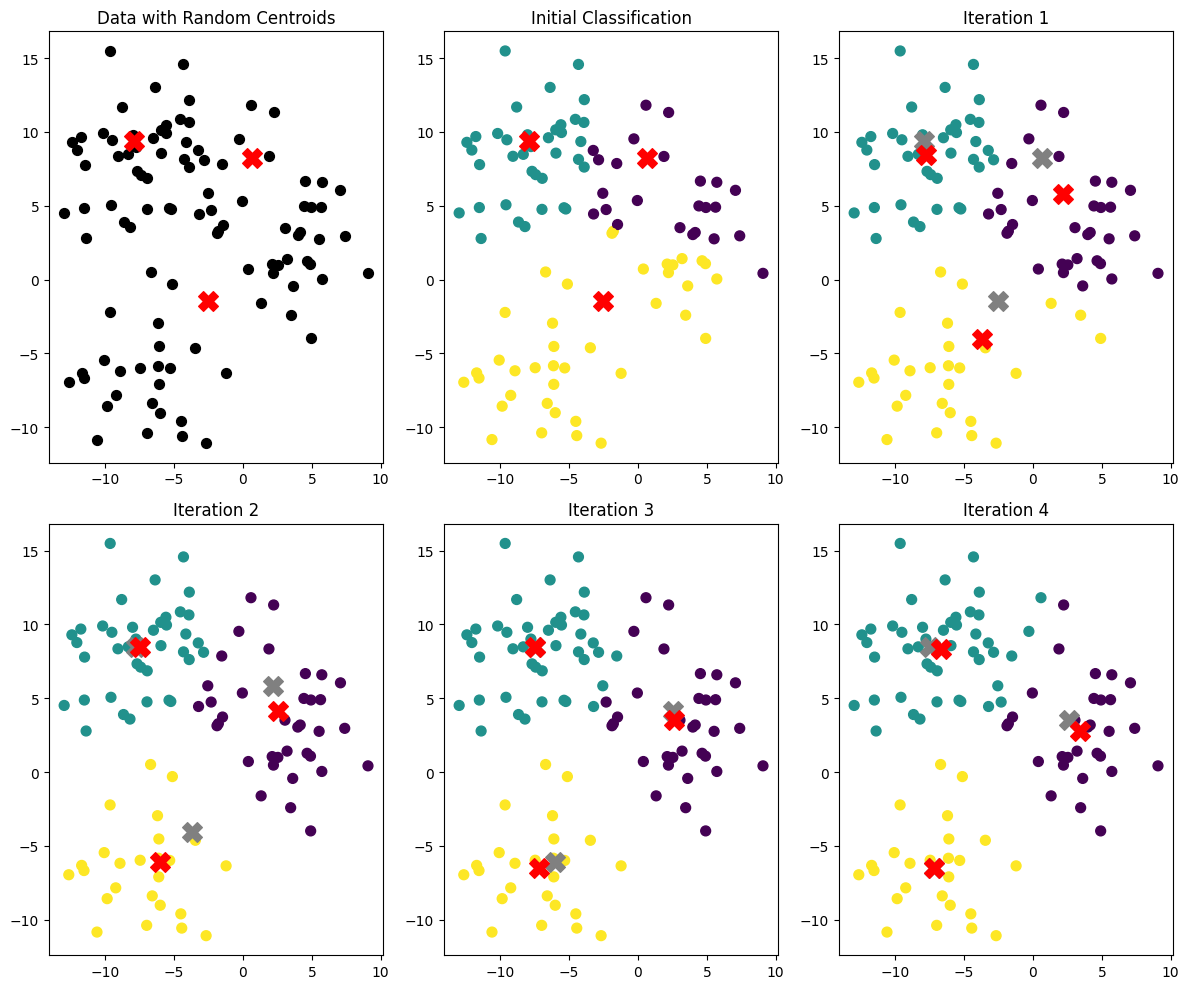

## Feature Engineering

In [30]:
cleaned_df.loc[:,'Sales_Total'] = cleaned_df['quantity'] * cleaned_df['price']

cleaned_df.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,Sales_Total
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.00,united kingdom,83.40
1,489434,79323p,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.00,united kingdom,81.00
2,489434,79323w,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.00,united kingdom,81.00
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.00,united kingdom,100.80
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.00,united kingdom,30.00


In [46]:
cleaned_df.to_csv('online_retail.csv', index=False)

In [31]:
aggregated_df = cleaned_df.groupby(by='customer_id', as_index=False) \
    .agg(
        monetary_value=("Sales_Total", "sum"),
        frequency=('invoice', 'nunique'),
        last_invoice_date=('invoice_date', "max")
    )

aggregated_df.head(5)

,customer_id,monetary_value,frequency,last_invoice_date
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [32]:
max_invoice_date = aggregated_df['last_invoice_date'].max()

aggregated_df['recency'] = (max_invoice_date - aggregated_df['last_invoice_date']).dt.days

aggregated_df.head(5)

,customer_id,monetary_value,frequency,last_invoice_date,recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


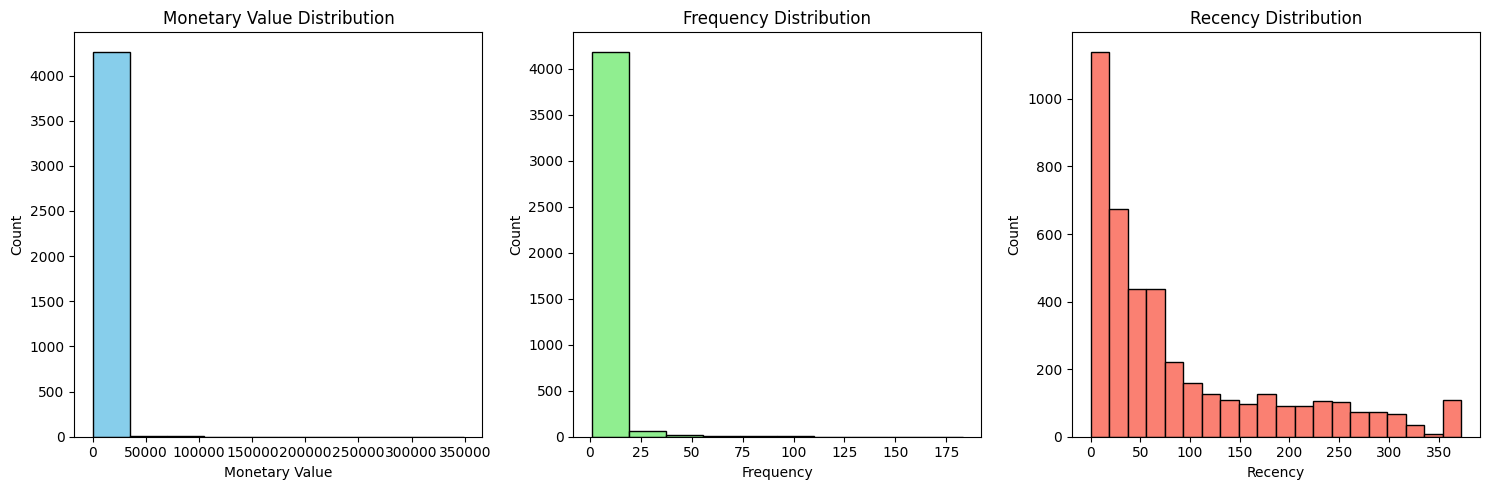

In [33]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['monetary_value'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

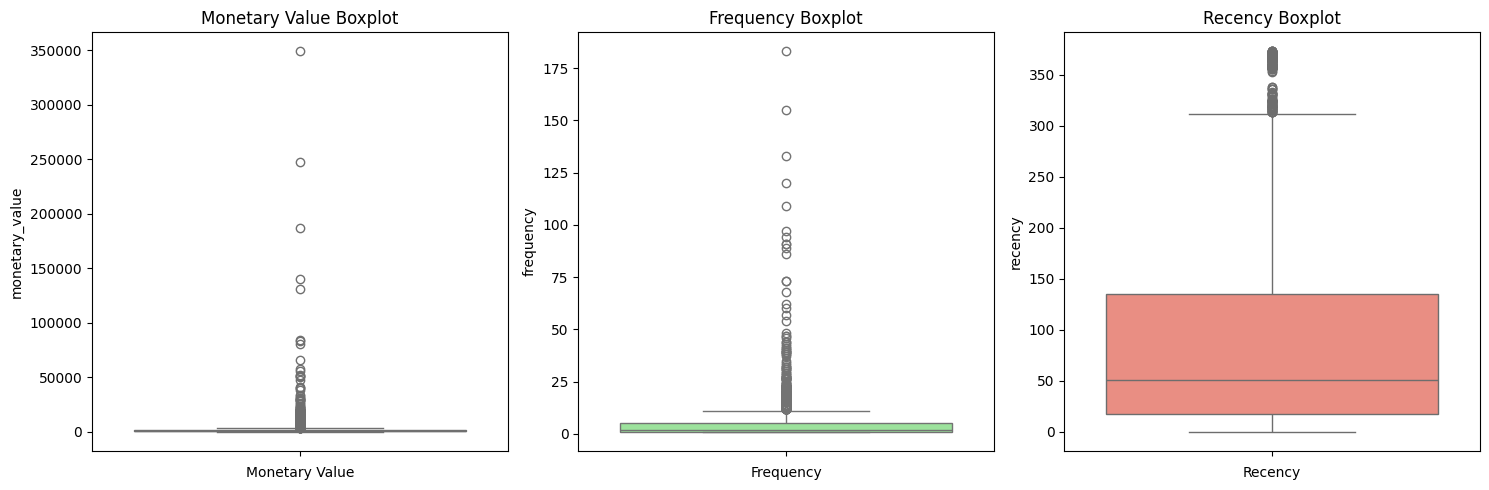

In [34]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['monetary_value'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [35]:
money_Q1 = aggregated_df["monetary_value"].quantile(0.25)
money_Q3 = aggregated_df["monetary_value"].quantile(0.75)
money_IQR = money_Q3 - money_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["monetary_value"] > (money_Q3 + 1.5 * money_IQR)) | (aggregated_df["monetary_value"] < (money_Q1 - 1.5 * money_IQR))].copy()

monetary_outliers_df.describe()

,customer_id,monetary_value,frequency,last_invoice_date,recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [36]:
freq_Q1 = aggregated_df['frequency'].quantile(0.25)
freq_Q3 = aggregated_df['frequency'].quantile(0.75)
freq_IQR = freq_Q3 - freq_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['frequency'] > (freq_Q3 + 1.5 * freq_IQR)) | (aggregated_df['frequency'] < (freq_Q1 - 1.5 * freq_IQR))].copy()

frequency_outliers_df.describe()

,customer_id,monetary_value,frequency,last_invoice_date,recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [37]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,customer_id,monetary_value,frequency,last_invoice_date,recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


In [38]:
# Get indices of rows where monetary_value > 2900
indices_to_drop = non_outliers_df.query('monetary_value > 1690').index

In [39]:
# Drop those rows
non_outliers_df = non_outliers_df.drop(indices_to_drop)
non_outliers_df.head()

,customer_id,monetary_value,frequency,last_invoice_date,recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
4,12351.00,300.93,1,2010-11-29 15:23:00,10
5,12352.00,343.80,2,2010-11-29 10:07:00,10


In [40]:
non_outliers_df.query('monetary_value > 1690')

,customer_id,monetary_value,frequency,last_invoice_date,recency


In [41]:
non_outliers_df.query('frequency > 9')

,customer_id,monetary_value,frequency,last_invoice_date,recency
826,13561.00,1678.86,10,2010-11-07 14:28:00,32
1085,13911.00,1654.08,11,2010-11-25 16:16:00,14
1896,15013.00,1641.30,10,2010-08-09 12:05:00,122
2416,15751.00,1380.44,11,2010-09-05 12:44:00,95
2491,15860.00,1525.50,10,2010-12-06 11:38:00,3
2847,16326.00,1621.03,10,2010-11-21 11:03:00,18
3278,16928.00,1174.13,10,2010-12-01 15:21:00,8
4001,17894.00,1333.57,11,2010-12-08 14:50:00,1
4007,17905.00,1572.78,10,2010-12-01 13:21:00,8


In [42]:
# Get indices of rows where monetary_value > 2900
indices_to_drop = non_outliers_df.query('frequency > 6.5').index

# Drop those rows
non_outliers_df = non_outliers_df.drop(indices_to_drop)
non_outliers_df.head()

,customer_id,monetary_value,frequency,last_invoice_date,recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
4,12351.00,300.93,1,2010-11-29 15:23:00,10
5,12352.00,343.80,2,2010-11-29 10:07:00,10


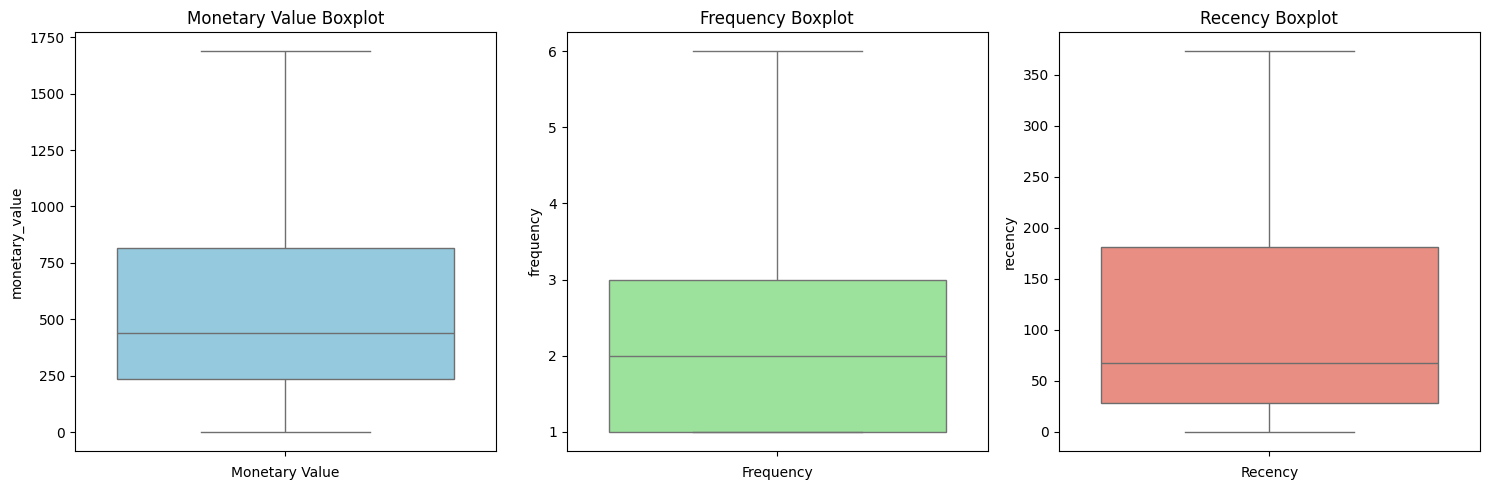

In [43]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['monetary_value'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

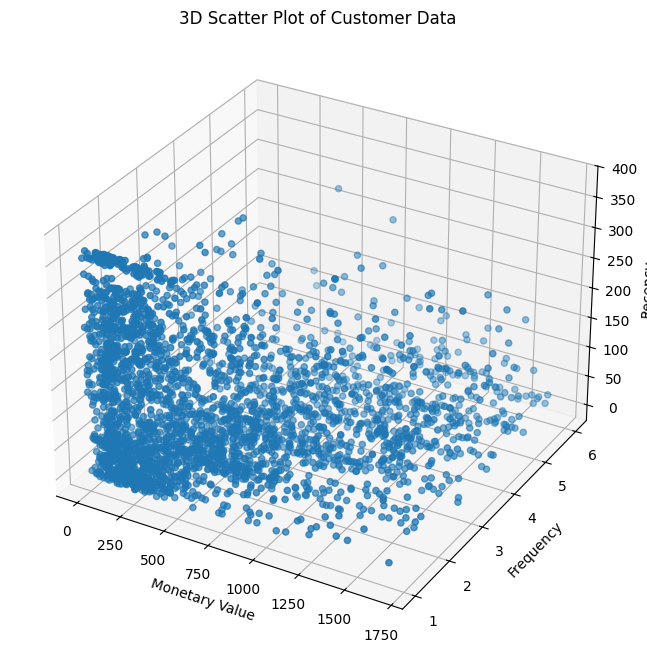

In [44]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["monetary_value"], non_outliers_df["frequency"], non_outliers_df["recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

Standard scaling transforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $z$ is the standardized value,
- $x$ is the original value,
- $\mu$ is the mean of the feature,
- $\sigma$ is the standard deviation of the feature.

In [47]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["monetary_value", "frequency", "recency"]])

scaled_data

array([[-0.9558276 , -0.07564501,  0.53424454],
       [ 1.84122868, -0.07564501, -1.05187686],
       [-0.83027081, -0.84350388, -0.35672489],
       ...,
       [-0.3684739 , -0.84350388, -0.425261  ],
       [-0.45253393, -0.84350388,  1.81684888],
       [ 1.65485683, -0.07564501,  0.01532828]])

In [48]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("monetary_value", "frequency", "recency"))

scaled_data_df.head()

,monetary_value,frequency,recency
0,-0.96,-0.08,0.53
1,1.84,-0.08,-1.05
2,-0.83,-0.84,-0.36
4,-0.64,-0.84,-0.97
5,-0.53,-0.08,-0.97


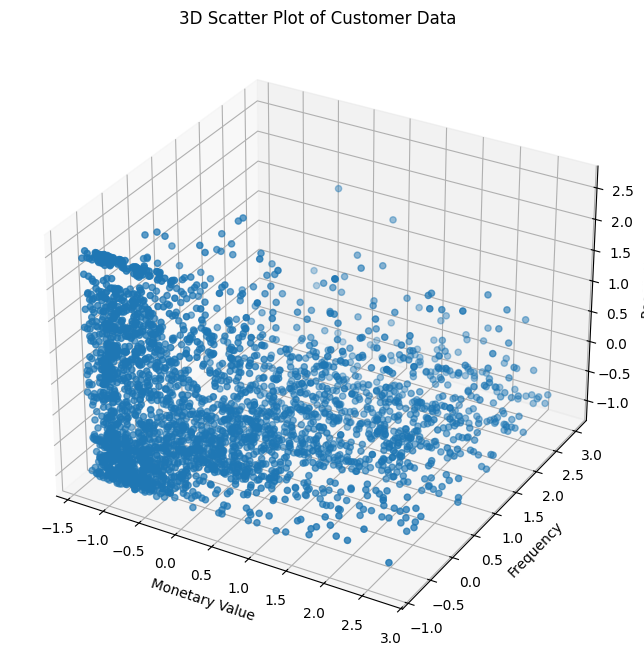

In [49]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["monetary_value"], scaled_data_df["frequency"], scaled_data_df["recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

## KMeans Clustering

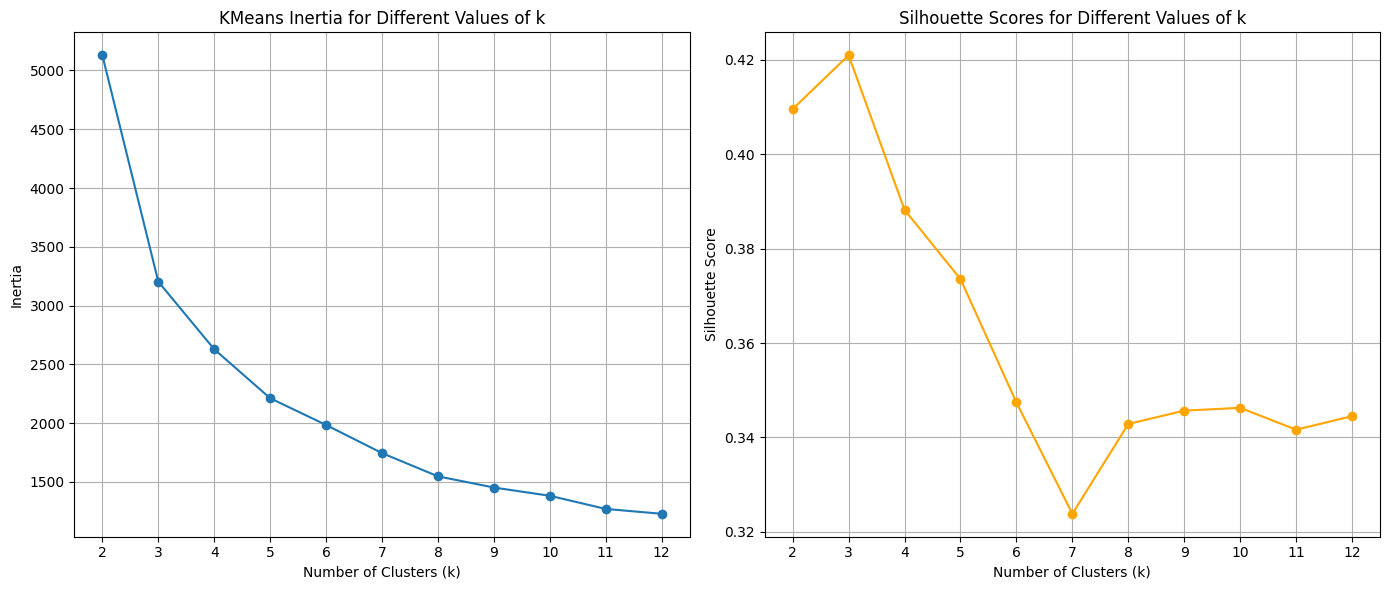

In [50]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

### Silhouette Score

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $s(i)$ is the silhouette score for a single sample $i$
- $a(i)$ is the average distance between $i$ and all other points in the same cluster,
- $b(i)$ is the minimum average distance between $i$ and all points in the nearest cluster to which $i$ does not belong.

The silhoutte score ranges between $[-1, 1]$, a higher value indicates more distinct clusters.

In [51]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([0, 2, 1, ..., 1, 0, 2], dtype=int32)

In [52]:
non_outliers_df.loc[:,"Cluster"] = cluster_labels

non_outliers_df.head()

,customer_id,monetary_value,frequency,last_invoice_date,recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,0
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1
5,12352.00,343.80,2,2010-11-29 10:07:00,10,1


In [53]:
non_outliers_df.to_csv('clean_online_retail.csv',index=False)

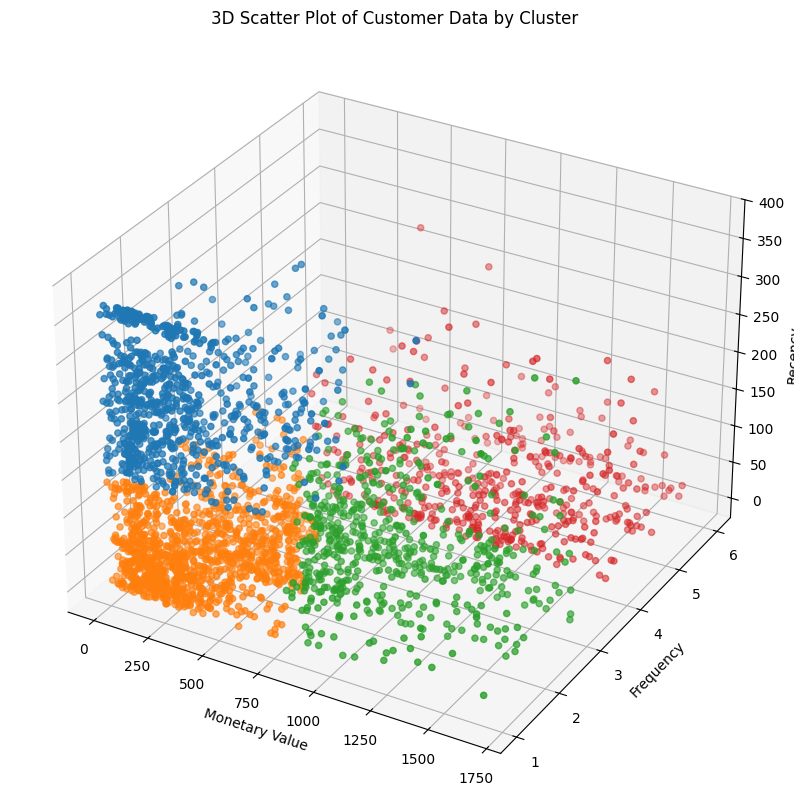

In [54]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['monetary_value'], 
                     non_outliers_df['frequency'], 
                     non_outliers_df['recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

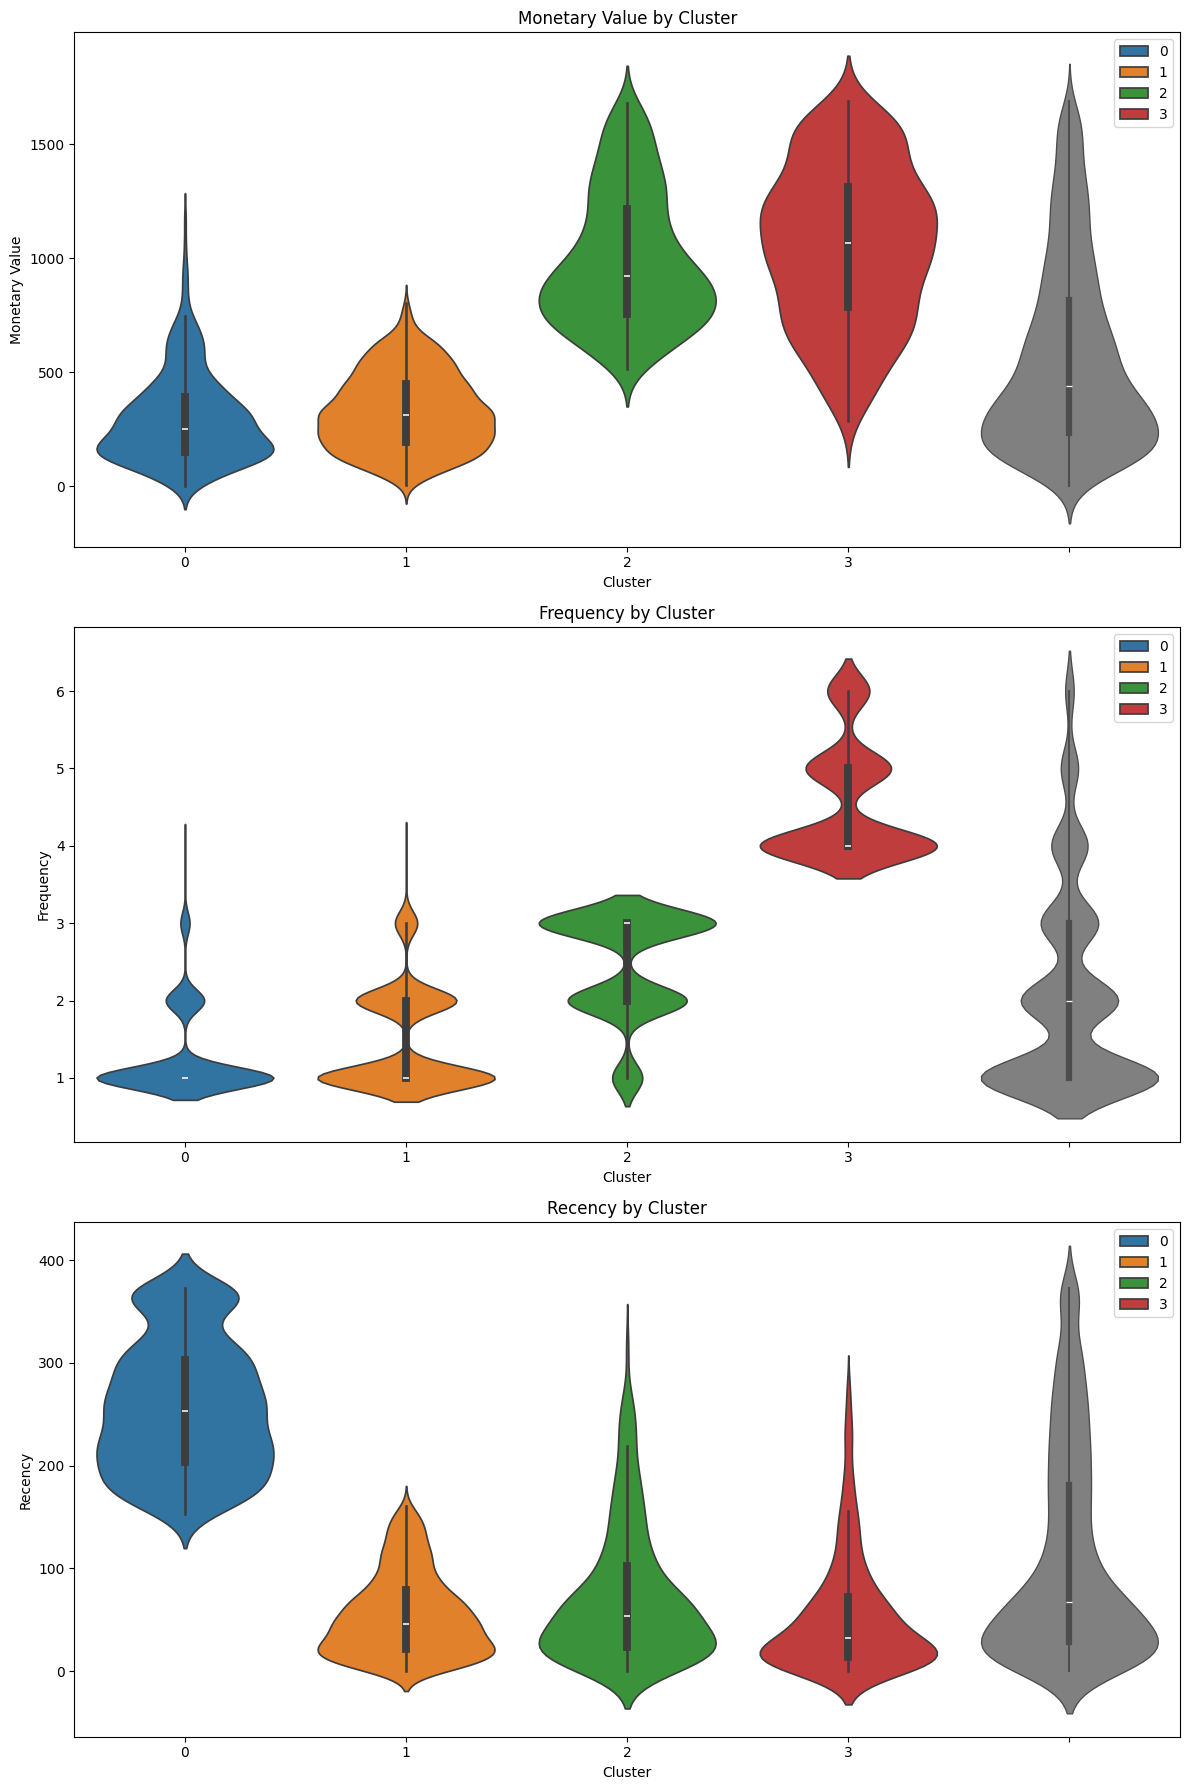

In [55]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y= non_outliers_df['monetary_value'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['monetary_value'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster 0 (Blue): "Retain"
* Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
* Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. Cluster 1 (Orange): "Re-Engage"
* Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
* Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. Cluster 2 (Green): "Nurture"
* Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
* Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. Cluster 3 (Red): "Reward"
* Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
* Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

**Summary of Cluster Names:**

* Cluster 0 (Blue): "Retain"
* Cluster 1 (Orange): "Re-Engage"
* Cluster 2 (Green): "Nurture"
* Cluster 3 (Red): "Reward"

In [56]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df.head()

,customer_id,monetary_value,frequency,last_invoice_date,recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1


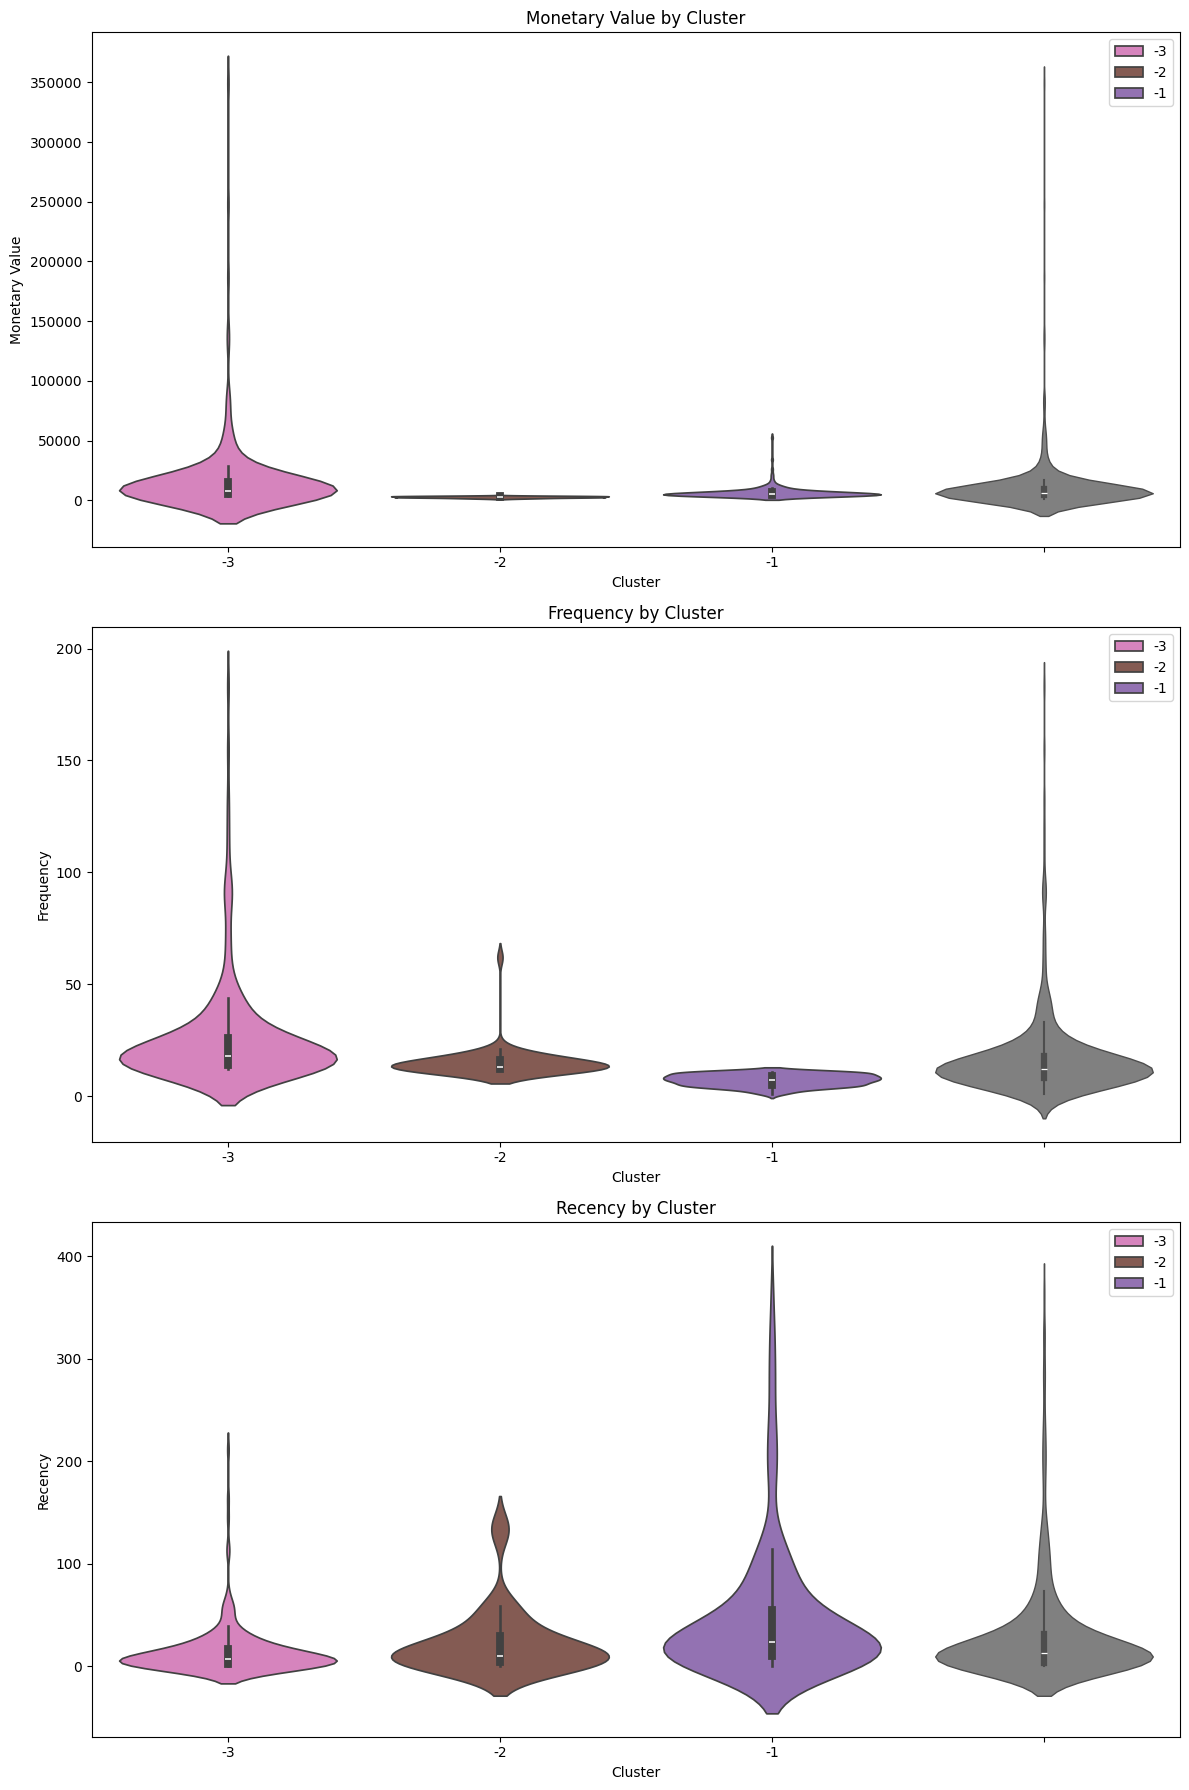

In [57]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['monetary_value'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['monetary_value'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

* Cluster -1 (Monetary Outliers) PAMPER:
Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

* Cluster -2 (Frequency Outliers) UPSELL:
Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

* Cluster -3 (Monetary & Frequency Outliers) DELIGHT:
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [58]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [59]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df.head()

,customer_id,monetary_value,frequency,last_invoice_date,recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,0
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1
5,12352.00,343.80,2,2010-11-29 10:07:00,10,1


In [60]:
full_clustering_df["Cluster_Label"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df.head()

,customer_id,monetary_value,frequency,last_invoice_date,recency,Cluster,Cluster_Label
0,12346.00,169.36,2,2010-06-28 13:53:00,164,0,RETAIN
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,2,NURTURE
2,12348.00,221.16,1,2010-09-27 14:59:00,73,1,RE-ENGAGE
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1,RE-ENGAGE
5,12352.00,343.80,2,2010-11-29 10:07:00,10,1,RE-ENGAGE


In [62]:
full_clustering_df.to_csv('clustered_online_retail.csv',index=False)

## Visualization

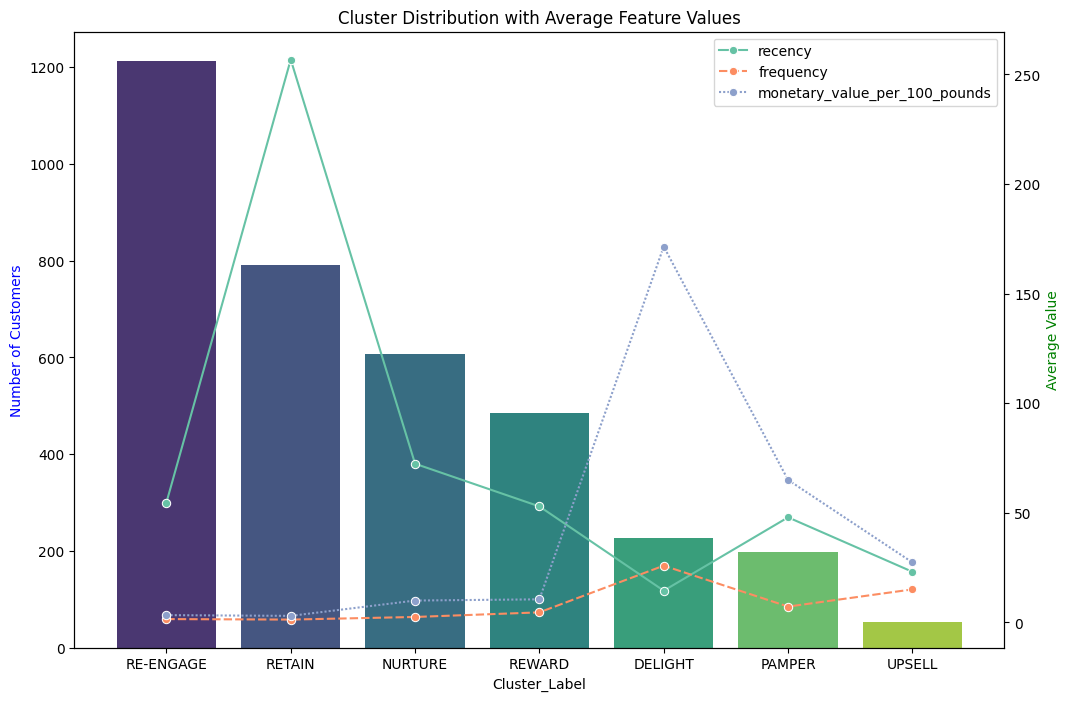

In [61]:
cluster_counts = full_clustering_df['Cluster_Label'].value_counts()
full_clustering_df["monetary_value_per_100_pounds"] = full_clustering_df["monetary_value"] / 100.00
feature_means = full_clustering_df.groupby('Cluster_Label')[['recency', 'frequency', 'monetary_value_per_100_pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()